## Balkendiagramme (Bar charts)

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 2](https://data-science.training/kapitel-2/)
* Datum: 23.03.2023

Wir erstellen Balkendiagramme mit Überlebenswahrscheinlichkeiten und absoluten Häufigkeiten zu den Attributen -- mit Hilfe der Seaborn-Bibliothek.

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt
# Seaborn importieren [sns = seaborn name space, Samuel Norman Seaborn]
#  High-end Daten-Visualisierungen auf Basis von Matplot
#  https://seaborn.pydata.org/
import seaborn as sns
# Deutsches Zahlenformat
import locale
locale.setlocale(locale.LC_ALL, 'de')
# Warnungen unterdrücken
#import warnings
#warnings.filterwarnings('ignore')

'de'

In [5]:
# Trainingsdaten als Pandas Data Frame (df) aus CSV-Datei laden
#  (KNIME: "CSV Reader")
df_train = pd.read_csv('../../data/titanic/original/train.csv')

In [6]:
# Datentypen automatisch konvertieren
df_train = df_train.convert_dtypes()

In [7]:
# Seaborn: Allgemeine Einstellungen

# Schriftart setzen
sns.set(font = 'Arial')
# Schriftgröße setzen
sns.set(font_scale = 2.5)
# Achsen im deutschen Zahlenformat
plt.rcParams['axes.formatter.use_locale'] = True
# Bildgröße setzen (16 x 9)
sns.set(rc={'figure.figsize':(8, 4.5)})
# Weißes Gitter setzen
sns.set_style('whitegrid')

In [8]:
display(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,<NA>,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,<NA>,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,<NA>,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,<NA>,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,<NA>,1,2,W./C. 6607,23.45,<NA>,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C


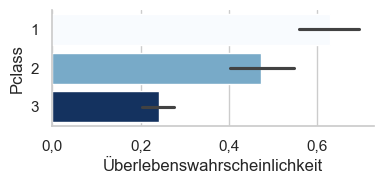

In [9]:
# (1a) Barplot zu Pclass: Überlebenswahrscheinlichkeit
sns.catplot(data=df_train, x='Survived', y='Pclass', kind='bar', palette='Blues', height=2, aspect=2, orient='h', hue='Pclass', legend=False)

# Achsen beschriften
plt.xlabel('Überlebenswahrscheinlichkeit')
plt.ylabel('Pclass')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_Pclass_1.svg', format='svg', dpi=1200, transparent=True)

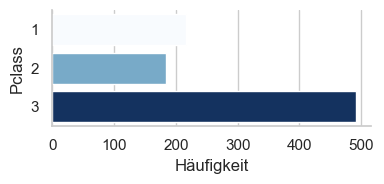

In [10]:
# (1b) Barplot zu Pclass: Absolute Häufigkeiten
sns.catplot(data=df_train, y='Pclass', kind='count', palette='Blues', height=2, aspect=2, hue='Pclass', legend=False)

# Achsen beschriften
plt.xlabel('Häufigkeit')
plt.ylabel('Pclass')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_Pclass_2.svg', format='svg', dpi=1200, transparent=True)

In [11]:
# (1c) Tabelle zu Pclass: Überlebenswahrscheinlichkeit
probs = df_train.groupby(['Pclass'], as_index=False, observed=False)['Survived'].mean()
display(probs)

,Pclass,Survived
0,1,0.62963
1,2,0.472826
2,3,0.242363


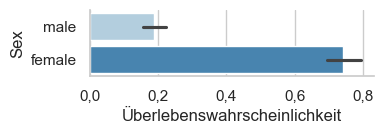

In [12]:
# (2a) Barplot zu Sex: Überlebenswahrscheinlichkeit
sns.catplot(data=df_train, x='Survived', y='Sex', kind='bar', palette='Blues', height=1.5, aspect=2.667, orient='h', hue='Sex', legend=False)

# Achsen beschriften
plt.xlabel('Überlebenswahrscheinlichkeit')
plt.ylabel('Sex')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_Sex_1.svg', format='svg', dpi=1200, transparent=True)

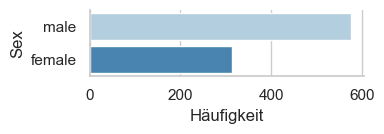

In [13]:
# (2b) Barplot zu Sex: Absolute Häufigkeiten
sns.catplot(data=df_train, y='Sex', kind='count', palette='Blues', height=1.5, aspect=2.667, hue='Sex', legend=False)

# Achsen beschriften
plt.xlabel('Häufigkeit')
plt.ylabel('Sex')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_Sex_2.svg', format='svg', dpi=1200, transparent=True)

In [14]:
# (2c) Tabelle zu Sex: Überlebenswahrscheinlichkeit
probs = df_train.groupby(['Sex'], as_index=False, observed=False)['Survived'].mean()
display(probs)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
# (3) Binning zu Age
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df_train['AgeBinned'] = pd.cut(df_train['Age'].dropna(), bins=bins)

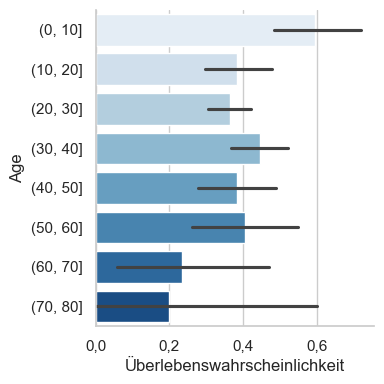

In [16]:
# (3a) Barplot zu Age: Überlebenswahrscheinlichkeit
sns.catplot(data=df_train, x='Survived', y='AgeBinned', kind='bar', palette='Blues', height=4, aspect=1, orient='h', hue='AgeBinned', legend=False)

# Achsen beschriften
plt.xlabel('Überlebenswahrscheinlichkeit')
plt.ylabel('Age')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_Age_1.svg', format='svg', dpi=1200, transparent=True)

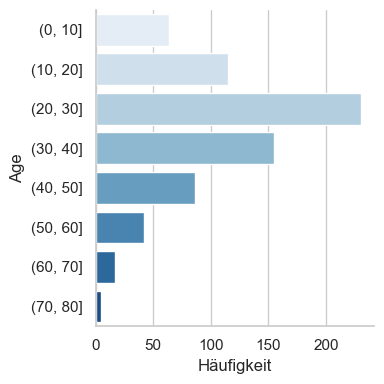

In [17]:
# (3b) Barplot zu Age: Absolute Häufigkeiten
sns.catplot(data=df_train, y='AgeBinned', kind='count', palette='Blues', height=4, aspect=1, hue='AgeBinned', legend=False)

# Achsen beschriften
plt.xlabel('Häufigkeit')
plt.ylabel('Age')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_Age_2.svg', format='svg', dpi=1200, transparent=True)

In [18]:
# (3c) Tabelle zu Age: Überlebenswahrscheinlichkeit
probs = df_train.groupby(['AgeBinned'], as_index=False, observed=False)['Survived'].mean()
display(probs)

,AgeBinned,Survived
0,"(0, 10]",0.59375
1,"(10, 20]",0.382609
2,"(20, 30]",0.365217
3,"(30, 40]",0.445161
4,"(40, 50]",0.383721
5,"(50, 60]",0.404762
6,"(60, 70]",0.235294
7,"(70, 80]",0.2


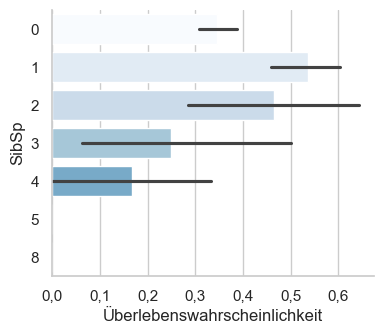

In [19]:
# (4a) Barplot zu SibSp: Überlebenswahrscheinlichkeit
sns.catplot(data=df_train, x='Survived', y='SibSp', kind='bar', palette='Blues', height=3.5, aspect=1.143, orient='h', hue='SibSp', legend=False)

# Achsen beschriften
plt.xlabel('Überlebenswahrscheinlichkeit')
plt.ylabel('SibSp')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_SibSp_1.svg', format='svg', dpi=1200, transparent=True)

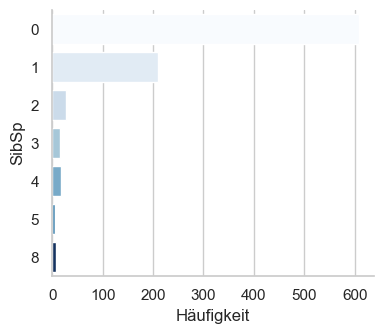

In [20]:
# (4b) Barplot zu SibSp: Absolute Häufigkeiten
sns.catplot(data=df_train, y='SibSp', kind='count', palette='Blues', height=3.5, aspect=1.143, hue='SibSp', legend=False)

# Achsen beschriften
plt.xlabel('Häufigkeit')
plt.ylabel('SibSp')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_SibSp_2.svg', format='svg', dpi=1200, transparent=True)

In [21]:
# (4c) Tabelle zu SibSp: Überlebenswahrscheinlichkeit
probs = df_train.groupby(['SibSp'], as_index=False, observed=False)['Survived'].mean()
display(probs)

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.25
4,4,0.166667
5,5,0.0
6,8,0.0


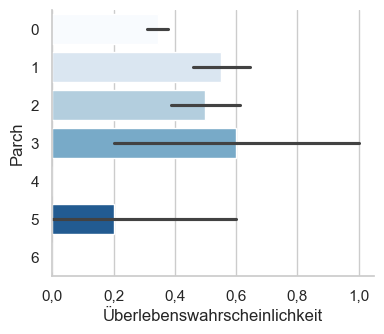

In [22]:
# (5a) Barplot zu Parch: Überlebenswahrscheinlichkeit
sns.catplot(data=df_train, x='Survived', y='Parch', kind='bar', palette='Blues', height=3.5, aspect=1.143, orient='h', hue='Parch', legend=False)

# Achsen beschriften
plt.xlabel('Überlebenswahrscheinlichkeit')
plt.ylabel('Parch')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_Parch_1.svg', format='svg', dpi=1200, transparent=True)

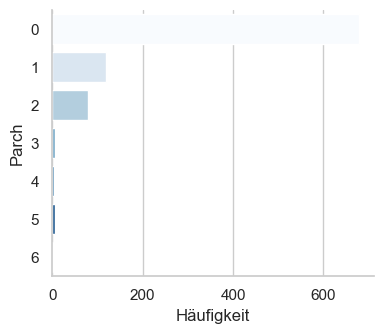

In [23]:
# (5b) Barplot zu Parch: Absolute Häufigkeiten
sns.catplot(data=df_train, y='Parch', kind='count', palette='Blues', height=3.5, aspect=1.143, hue='Parch', legend=False)

# Achsen beschriften
plt.xlabel('Häufigkeit')
plt.ylabel('Parch')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_Parch_2.svg', format='svg', dpi=1200, transparent=True)

In [24]:
# (5c) Tabelle zu Parch: Überlebenswahrscheinlichkeit
probs = df_train.groupby(['Parch'], as_index=False, observed=False)['Survived'].mean()
display(probs)

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.5
3,3,0.6
4,4,0.0
5,5,0.2
6,6,0.0


In [25]:
# (6) Binning zu Fare
bins = [0, 8, 16, 32, 64, 128, 256, 512, 1024]
df_train['FareBinned'] = pd.cut(df_train['Fare'].dropna(), bins=bins)

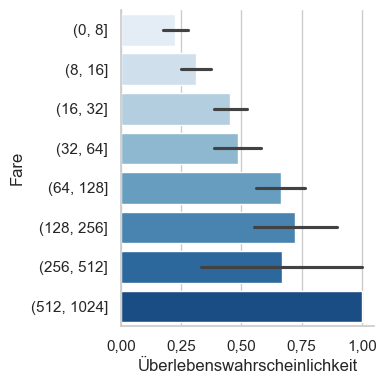

In [26]:
# (6a) Barplot zu Fare: Überlebenswahrscheinlichkeit
sns.catplot(data=df_train, x='Survived', y='FareBinned', kind='bar', palette='Blues', height=4, aspect=1, orient='h', hue='FareBinned', legend=False)

# Achsen beschriften
plt.xlabel('Überlebenswahrscheinlichkeit')
plt.ylabel('Fare')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_Fare_1.svg', format='svg', dpi=1200, transparent=True)

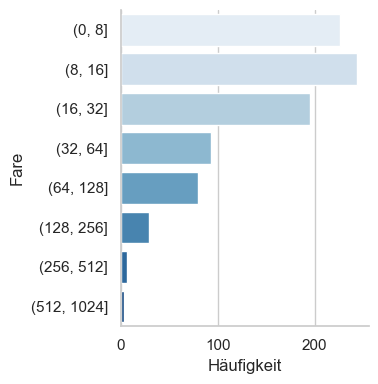

In [27]:
# (6b) Barplot zu Fare: Absolute Häufigkeiten
sns.catplot(data=df_train, y='FareBinned', kind='count', palette='Blues', height=4, aspect=1, hue='FareBinned', legend=False)

# Achsen beschriften
plt.xlabel('Häufigkeit')
plt.ylabel('Fare')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_Fare_2.svg', format='svg', dpi=1200, transparent=True)

In [28]:
# (6c) Tabelle zu Fare: Überlebenswahrscheinlichkeit
probs = df_train.groupby(['FareBinned'], as_index=False, observed=False)['Survived'].mean()
display(probs)

,FareBinned,Survived
0,"(0, 8]",0.225664
1,"(8, 16]",0.311475
2,"(16, 32]",0.451282
3,"(32, 64]",0.483871
4,"(64, 128]",0.6625
5,"(128, 256]",0.724138
6,"(256, 512]",0.666667
7,"(512, 1024]",1.0


In [29]:
# (7) Embarked
#  zunächst fehlende Werte "behandeln"
mode = df_train['Embarked'].mode()[0]
#df_train['Embarked'].fillna(mode, inplace=True)
df_train['Embarked'] = df_train['Embarked'].fillna(mode)

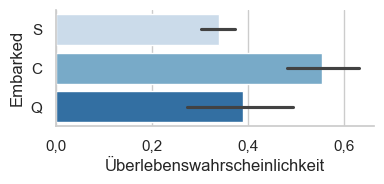

In [30]:
# (7a) Barplot zu Embarked: Überlebenswahrscheinlichkeit
sns.catplot(data=df_train, x='Survived', y='Embarked', kind='bar', palette='Blues', height=2, aspect=2, orient='h', hue='Embarked', legend=False)

# Achsen beschriften
plt.xlabel('Überlebenswahrscheinlichkeit')
plt.ylabel('Embarked')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_Embarked_1.svg', format='svg', dpi=1200, transparent=True)

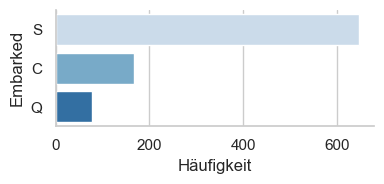

In [31]:
# (7b) Barplot zu Embarked: Absolute Häufigkeiten
sns.catplot(data=df_train, y='Embarked', kind='count', palette='Blues', height=2, aspect=2, hue='Embarked', legend=False)

# Achsen beschriften
plt.xlabel('Häufigkeit')
plt.ylabel('Embarked')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_Embarked_2.svg', format='svg', dpi=1200, transparent=True)

In [32]:
# (7c) Tabelle zu Embarked: Überlebenswahrscheinlichkeit
probs = df_train.groupby(['Embarked'], as_index=False, observed=False)['Survived'].mean()
display(probs)

,Embarked,Survived
0,C,0.553571
1,Q,0.38961
2,S,0.339009
